In [3]:
# We need to install two specific packages to handles graphs:
!pip install networkx
!pip install pgmpy

In [ ]:

import networkx as nx
from pgmpy.base.DAG import DAG
import matplotlib.pyplot as plt
import pandas as pd


In this practical session, we will cover the following topics:
- Graph Generation and Plotting
- Simulation studies for common causal fallacies
  - Fork paths
  - Collider bias

# Graph Generation and Plotting

The following DAG is due to Judea Pearl.
We will use it to illustrate how to generate a graph and plot it.
We will also show how to compute the ancestors and descendants of a node.

In [7]:
digraph = nx.DiGraph(
    [
        ("Z1", "X1"),
        ("X1", "D"),
        ("Z1", "X2"),
        ("Z2", "X3"),
        ("X3", "Y"),
        ("Z2", "X2"),
        ("X2", "Y"),
        ("X2", "D"),
        ("M", "Y"),
        ("D", "M"),
    ]
)

In [8]:
G = DAG(digraph)

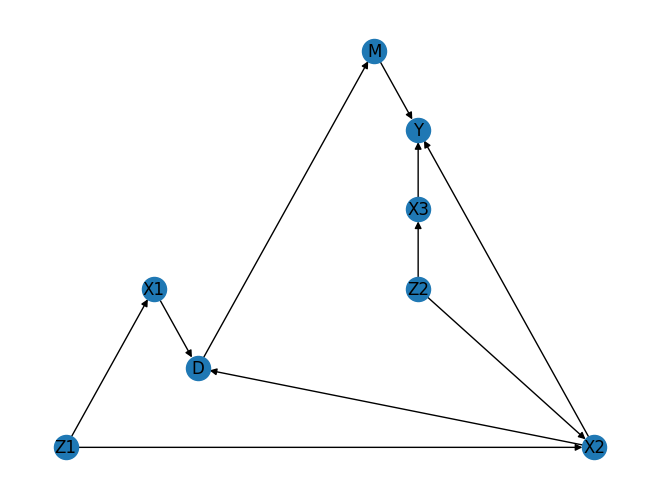

In [9]:
nx.draw_planar(G, with_labels=True)
plt.show()

In [11]:
print(list(G.predecessors("X2")))
print(list(G.successors("X2")))
print(list(nx.ancestors(G, "X2")))
print(list(nx.descendants(G, "X2")))

['Z1', 'Z2']
['Y', 'D']
['Z1', 'Z2']
['D', 'M', 'Y']


In [12]:
# Find Paths Between D and Y
list(nx.all_simple_paths(G.to_undirected(), "D", "Y"))

[['D', 'X1', 'Z1', 'X2', 'Y'],
 ['D', 'X1', 'Z1', 'X2', 'Z2', 'X3', 'Y'],
 ['D', 'M', 'Y'],
 ['D', 'X2', 'Y'],
 ['D', 'X2', 'Z2', 'X3', 'Y']]

In [13]:
# These returns all conditional independencies even among two sets of variables
# conditional on a third set
dseps = G.get_independencies()
# we display only the ones that correpond to pairs of singletons
for dsep in dseps.get_assertions():
    if len(dsep.get_assertion()[1]) == 1:
        print(dsep)

(M ⟂ X3 | Z2)
(M ⟂ X3 | X1, Z2)
(M ⟂ X3 | Z1, Z2)
(M ⟂ X3 | X2, Z2)
(M ⟂ X3 | X1, Z1, Z2)
(M ⟂ Z2 | X2, X3, Z1)
(M ⟂ X3 | X2, Z1, Z2)
(M ⟂ X1 | D, Y, X2, Z1)
(M ⟂ Z2 | X2, X1, X3, Z1)
(M ⟂ Z1 | X2, X1, X3, Z2)
(M ⟂ X3 | X2, X1, Z1, Z2)
(M ⟂ Z1 | X2, X1, Y, Z2)
(M ⟂ Z2 | X2, Y, X3, Z1)
(M ⟂ Z2 | X2, X1, X3, Z1, D)
(M ⟂ X2 | Z2, X1, X3, Z1, D)
(M ⟂ Z1 | X2, Z2, X1, X3, D)
(M ⟂ X3 | X2, Z2, X1, Z1, D)
(M ⟂ Z1 | X2, Z2, X1, Y, D)
(M ⟂ X1 | X2, Z2, X3, Z1, D)
(M ⟂ X1 | X2, Z2, Y, Z1, D)
(M ⟂ Z2 | X2, X1, X3, Y, Z1)
(M ⟂ Z1 | X2, Z2, X1, X3, Y)
(M ⟂ Z2 | X2, X1, X3, Y, Z1, D)
(M ⟂ Z1 | X2, Z2, X1, X3, Y, D)
(M ⟂ X1 | X2, Z2, X3, Y, Z1, D)
(X2 ⟂ X1 | Z1)
(X2 ⟂ M | D)
(X2 ⟂ X3 | Z2)
(X2 ⟂ X3 | M, Z2)
(X2 ⟂ M | D, X1)
(X2 ⟂ X3 | X1, Z2)
(X2 ⟂ X1 | X3, Z1)
(X2 ⟂ M | D, X3)
(X2 ⟂ M | D, Z1)
(X2 ⟂ X3 | M, X1, Z2)
(X2 ⟂ X3 | M, Z1, Z2)
(X2 ⟂ X3 | D, M, Z2)
(X2 ⟂ M | D, X1, X3)
(X2 ⟂ M | D, X1, Z1)
(X2 ⟂ X3 | X1, Z1, Z2)
(X2 ⟂ M | D, X3, Z1)
(X2 ⟂ X1 | X3, Z1, Z2)
(X2 ⟂ M | D, X3, Z2)
(X2 ⟂ X3 | M, 

# Simulation studies

## A fork of icecream under the sun

[Credits to Prof. Reza Arghandeh](https://github.com/Ci2Lab/Applied_Causal_Inference_Course/blob/main/lectures/CH-3-Graphical-Causal-Models.ipynb)

In hot summer months, people tend to consume more ice cream and are also more
likely to get sunburns. While it might seem that Ice Cream Consumption (I) and
 Number of Sunburns (S) are related, this relationship is actually driven by a
third variable, Hot Temperature (H).

### Causal graph for icecream and sunburns

- TODO: Draw the causal graph corresponding to the causal relationships
between these variables.

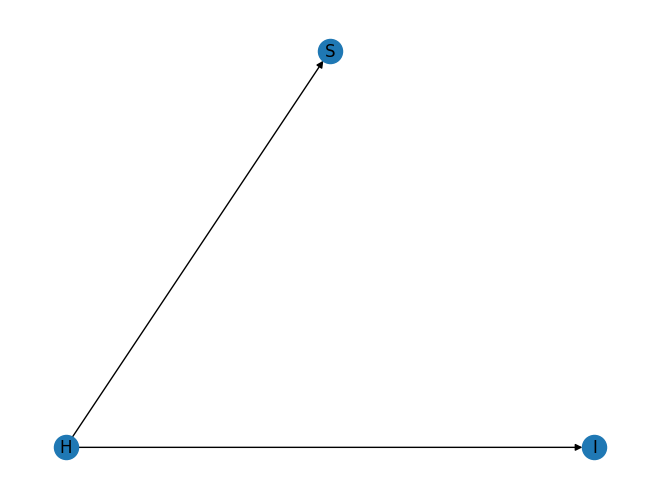

In [15]:
# CODE HERE

digraph2 = nx.DiGraph(
    [
        ("H", "I"),
        ("H", "S")
    ]
)

G2 = DAG(digraph2)

nx.draw_planar(G2, with_labels=True)
plt.show()

### Simulate the data for icecream and sunburns
Let's generate synthetic data for the three variables:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Simulating Hot Temperature (T)
hot_temperature = np.random.normal(
    loc=30, scale=5, size=100
)  # Average temperature of 30 degrees with some variation

# Simulating Ice Cream Consumption (I) based on Temperature (T)
ice_cream_consumption = 2 * hot_temperature + np.random.normal(
    loc=0, scale=5, size=100
)  # Higher temperature, more ice cream

# Simulating Number of Sunburns (S) based on Temperature (T)
number_of_sunburns = 1.5 * hot_temperature + np.random.normal(
    loc=0, scale=3, size=100
)  # Higher temperature, more sunburns

# Creating a DataFrame for the data
data = pd.DataFrame(
    {
        "hot_temperature": hot_temperature,
        "ice_cream_consumption": ice_cream_consumption,
        "number_sunburns": number_of_sunburns,
    }
)

# Display the first few rows of the dataset
data.head()

,hot_temperature,ice_cream_consumption,number_sunburns
0,32.483571,57.890288,49.798718
1,29.308678,56.514130,45.645371
2,33.238443,64.763313,53.106818
3,37.615149,71.218912,59.584130
4,28.829233,56.852038,39.110842


### Visualize the relationships between icecream and sunburns
We now use a scatter plot matrix to visualize the pairwise relationships
between Hot Temperature, Ice Cream Consumption, and Number of Sunburns.
- TODO: Visualize the scatter plot matrix for the data. You can use the
pairplot function from seaborn.

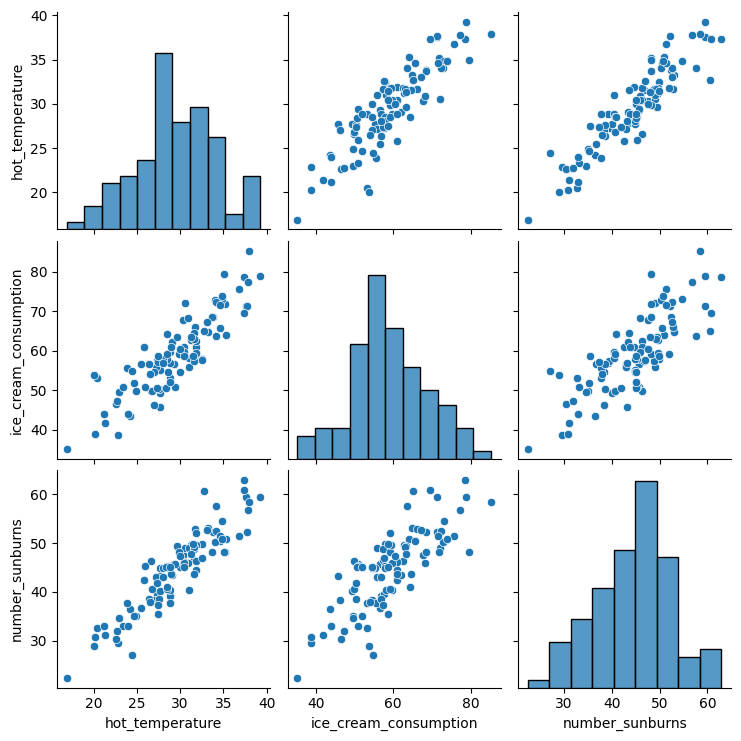

In [18]:
# CODE HERE
# Creating the scatter plot matrix
sns.pairplot(data)
plt.show()

### Regression analysis for icecream and sunburns
First let's begin by a naive regression analysis between Ice Cream Consumption
 and Number of Sunburns.

In [19]:
import statsmodels.formula.api as smf

# Resizualized with Hot Temperature
naive_fit = smf.ols("number_sunburns ~ ice_cream_consumption", data).fit()
print(naive_fit.summary())

                            OLS Regression Results                            
Dep. Variable:        number_sunburns   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     173.6
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           2.04e-23
Time:                        10:27:59   Log-Likelihood:                -299.48
No. Observations:                 100   AIC:                             603.0
Df Residuals:                      98   BIC:                             608.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.88

We see that the coefficient for ice_cream_consumption is positive and
statistically significant. This might lead us to believe that ice cream
consumption causes sunburns. However, this is not the case. The relationship
 between ice cream consumption and sunburns is confounded by hot temperature.
 Let's see what happens when we control for hot temperature.

### Resizualized with Hot Temperature
- TODO: Perform a regression analysis for both the ice cream and the number of
 sun burns to *regress away* the effect of the hot_temperature.
Regression for ice_cream_consumption

In [22]:
# Regress away the effect of hot temperature
# Step 1: Residualizing ice cream consumption
icecream_residuals = smf.ols("ice_cream_consumption ~ hot_temperature", data=data).fit().resid

# Step 2: Residualizing number of sunburns
sunburns_residuals = smf.ols("number_sunburns ~ hot_temperature", data=data).fit().resid

# Step 3: Regression on residualized variables
residual_data = pd.DataFrame({
    "sunburns_residuals": sunburns_residuals,
    "icecream_residuals": icecream_residuals
})

residual_fit = smf.ols("sunburns_residuals ~ icecream_residuals", data=residual_data).fit()
print("\nRegression on Residualized Variables:\n", residual_fit.summary())


Regression on Residualized Variables:
                             OLS Regression Results                            
Dep. Variable:     sunburns_residuals   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.01164
Date:                Tue, 04 Mar 2025   Prob (F-statistic):              0.914
Time:                        10:33:44   Log-Likelihood:                -257.48
No. Observations:                 100   AIC:                             519.0
Df Residuals:                      98   BIC:                             524.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Lets's vizualize the debiased data.

## Visualize the residuals (relationship after conditioning)


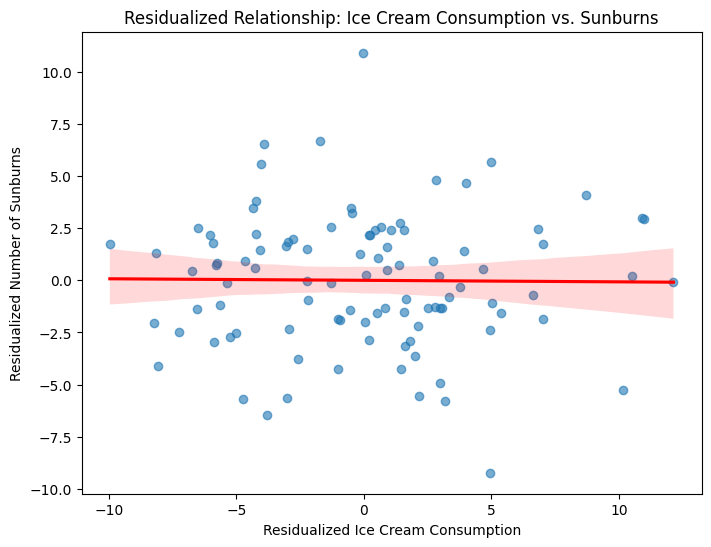

In [23]:
# CODE HERE

# Scatter plot of residualized variables
plt.figure(figsize=(8, 6))
sns.regplot(x=residual_data["icecream_residuals"], y=residual_data["sunburns_residuals"],
            scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.xlabel("Residualized Ice Cream Consumption")
plt.ylabel("Residualized Number of Sunburns")
plt.title("Residualized Relationship: Ice Cream Consumption vs. Sunburns")
plt.show()

## Debiased regression

In [25]:
print(
    smf.ols("sunburns_residuals ~ icecream_residuals", data=residual_data).fit().summary()
)


                            OLS Regression Results                            
Dep. Variable:     sunburns_residuals   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.01164
Date:                Tue, 04 Mar 2025   Prob (F-statistic):              0.914
Time:                        10:37:01   Log-Likelihood:                -257.48
No. Observations:                 100   AIC:                             519.0
Df Residuals:                      98   BIC:                             524.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.742e-14      0



```
# Ce texte est au format code
```

TODO: What do you observe in the debiased regression analysis? WHat value do the coefficient of ice_cream_residuals take? What does it suggest for the relationship between ice cream consumption and number of sunburns?

The apparent link between ice cream consumption and sunburns was due to hot temperature driving both variables. The residualized regression confirms that ice cream consumption does not cause sunburns, and the initial relationship was purely spurious.









# Collider bias for celebrities at Hollywood

Here is a simple example to illustate the collider or M-bias.
Credits to [Chernozhulov et al., 2024, Causal ML book](https://www.causalml-book.org/).

The idea is that people who get to Hollywood tend to have a high
congenility = talent + beauty. Funnily enough this induces a negative
correlation between talents and looks, when we condition on the set of actors
or celebrities.

This simple example explains an anecdotal observation that "talent and beauty
are negatively correlated" for celebrities.
This is a form of collider bias, also coined as selection bias for this specific case.
Talent : la capacité d’un acteur à bien jouer.
Beauté : l’attrait physique de l’acteur.
Succès à Hollywood : la probabilité qu’une personne devienne une célébrité.

Dans la population générale, talent et beauté sont indépendants : il y a des gens talentueux et beaux, d’autres talentueux mais pas beaux, et vice versa.
Mais quand on conditionne sur les célébrités, c'est-à-dire qu'on ne regarde que les gens qui ont réussi à Hollywood, on introduit un biais :
Ceux qui sont très beaux peuvent percer même s'ils ont moins de talent.
Ceux qui sont très talentueux peuvent percer même s'ils sont moins beaux.
Par contre, ceux qui sont peu talentueux et peu beaux ne deviennent pas célèbres.
Résultat : parmi les acteurs célèbres, il semble y avoir une relation négative entre talent et beauté, même si cette relation n'existe pas dans la population générale.
4. Pourquoi c'est un biais ?
Dans la population totale, talent et beauté ne sont pas nécessairement corrélés.
Mais en regardant seulement les célébrités (donc en conditionnant sur le succès), on exclut ceux qui n’ont ni talent ni beauté.
Cela induit artificiellement une relation négative entre talent et beauté, alors qu’en réalité, aucune relation causale directe n’existe entre ces deux variables.
5. Application générale du collider bias

## notes :
Un collider bias (ou biais de collision) se produit lorsqu'une variable est influencée par deux autres variables, et que l'on conditionne (contrôle) cette variable dans une analyse, ce qui crée une fausse association entre les deux autres variables, même si elles étaient indépendantes au départ.

Imaginons une entreprise qui n’embauche que les personnes ayant soit une très bonne formation, soit une grande expérience. Ici :

Formation → Influence l’embauche
Expérience → Influence aussi l’embauche
Embauche est le collider.
Si on analyse uniquement les employés (donc on conditionne sur l’embauche), on pourrait observer une corrélation négative entre formation et expérience : parmi ceux embauchés, ceux qui ont moins de formation ont souvent plus d'expérience, et vice versa. Pourtant, dans la population générale, il n’y avait peut-être aucune relation entre ces deux variables !

### Causal graph for celebrities at Hollywood

- TODO: Draw the graph the graph corresponding to the causal relationships between these variables.

In [ ]:
# CODE HERE
# CODE HERE

digraph3 = nx.DiGraph(
    [
        ("Talent", "Beauty"),
        ("Congenility", "S")
    ]
)

G2 = DAG(digraph2)

nx.draw_planar(G2, with_labels=True)
plt.show()


### Simulate the data for celebrities at Hollywood

In [ ]:
np.random.seed(123)
num_samples = 10000
talent = np.random.normal(size=num_samples)
beauty = np.random.normal(size=num_samples)
congeniality = talent + beauty + np.random.normal(size=num_samples)  # congeniality
hollywood_data = pd.DataFrame(
    {
        "talent": talent,
        "beauty": beauty,
        "congeniality": congeniality,
    }
)
# Create the conditional variable: celebrity is True if congeniality > 2
hollywood_data["celebrity"] = hollywood_data["congeniality"] > 2

### Visualize the relationships for celebrities at Hollywood
- TODO: Visualize the pairplot :
 - for the whole data.
 - only for the celebrities.

In [ ]:
# CODE HERE

We see that for the whole data, there is no correlation between talent and
beauty. However, when we condition on the set of celebrities, we see a
negative correlation between talent and beauty. This is an example of collider
bias.

### Regression analysis for celebrities at Hollywood
Recover what we have seen in the pairplot, that is, the negative correlation
between talent and beauty for celebrities.
- TODO: Perform regression analysis to show the collider bias. You should
contrast a regression analysis for the whole data and for the celebrities only.

In [ ]:
# CODE HERE